## Imports

In [1]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Funciones auxiliares

In [2]:
def resize_image(image, scale):
    image_height, image_width = image.shape
    new_height = int(image_height * scale)
    new_width = int(image_width * scale)

    return cv.resize(image, (new_width, new_height), cv.INTER_AREA)

def find_pattern(image, template):
    template_height, template_width = template.shape

    result = cv.matchTemplate(grayscale_image, template, cv.TM_CCOEFF_NORMED)

    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

    top_left = max_loc

    bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

    return top_left, bottom_right

## 1 - Prueba de templates
Primero se obtuvieron templates de todas las imágenes intentando dejar afuera la mayor parte de los elementos que pueden variar mas entre las imágenes:
- Las orejas que varían por la posición/rotación de Messi en la imagen.
- La barba y el pelo que varían en base a cuando fue tomada la foto.
Se usará como método de comparación **TM_CCOEFF_NORMED** dado que es uno de los mas utilizados.

======== Using template messi-1-template.jpg
processing image messi-1.jpg...


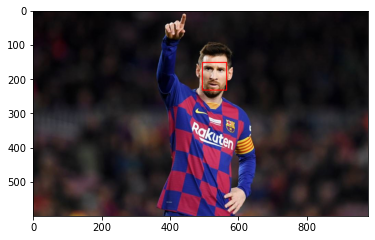

processing image messi-2.jpg...


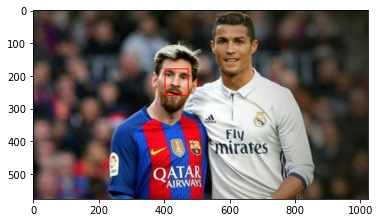

processing image messi-3.jpg...


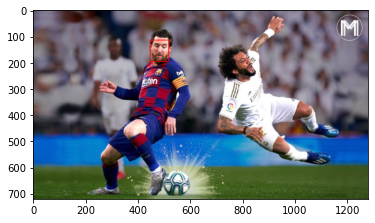

processing image messi-4.jpg...


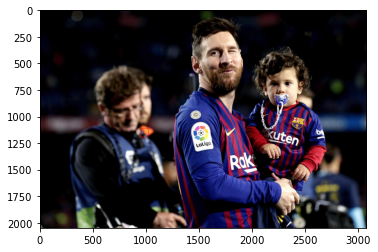

processing image messi-5.jpg...


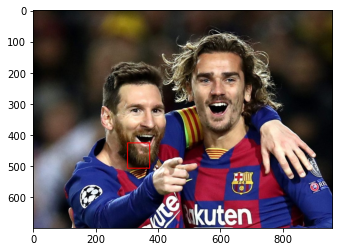

processing image messi-6.jpg...


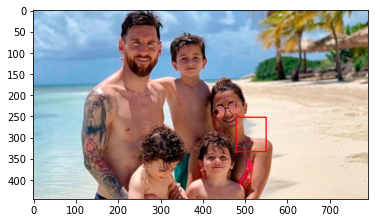

======== Using template messi-2-template.jpg
processing image messi-1.jpg...


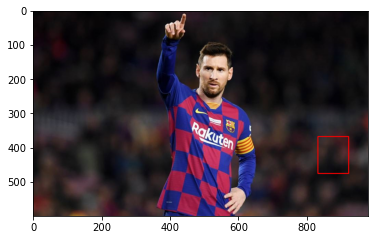

processing image messi-2.jpg...


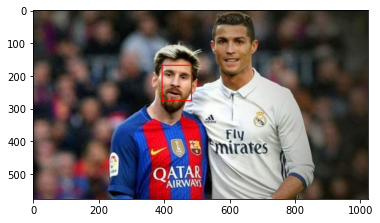

processing image messi-3.jpg...


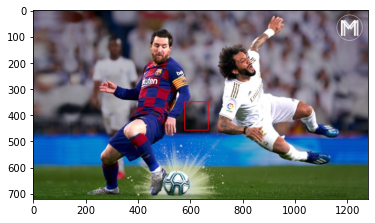

processing image messi-4.jpg...


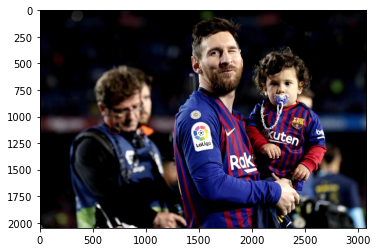

processing image messi-5.jpg...


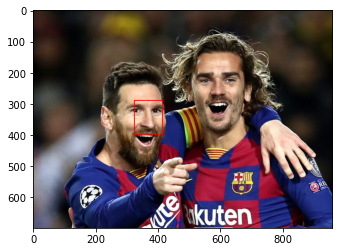

processing image messi-6.jpg...


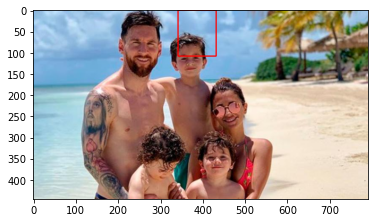

======== Using template messi-3-template.jpg
processing image messi-1.jpg...


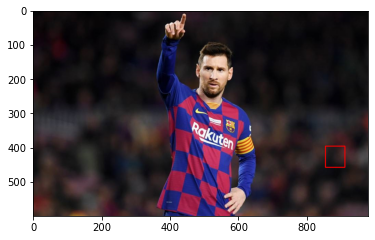

processing image messi-2.jpg...


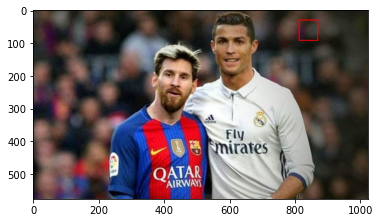

processing image messi-3.jpg...


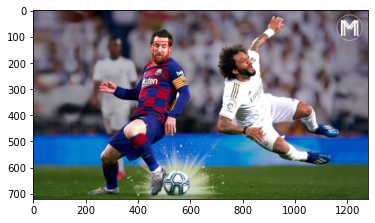

processing image messi-4.jpg...


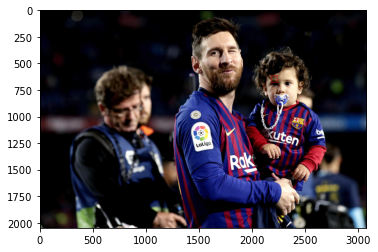

processing image messi-5.jpg...


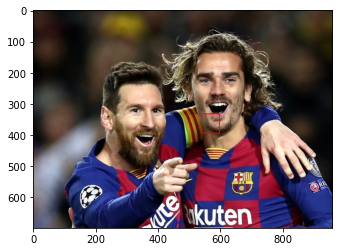

processing image messi-6.jpg...


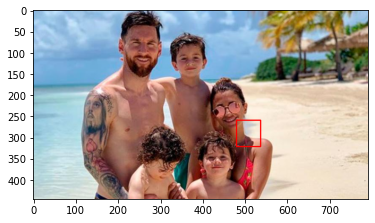

======== Using template messi-4-template.jpg
processing image messi-1.jpg...


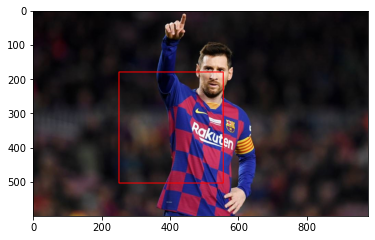

processing image messi-2.jpg...


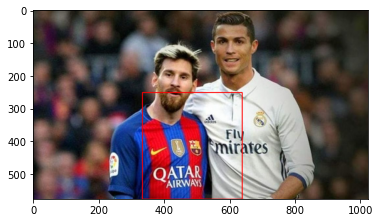

processing image messi-3.jpg...


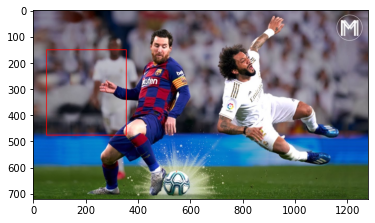

processing image messi-4.jpg...


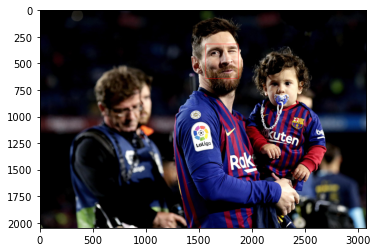

processing image messi-5.jpg...


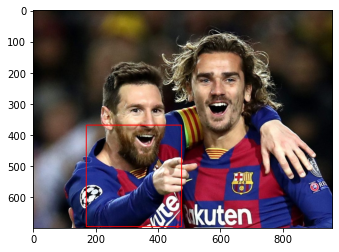

processing image messi-6.jpg...


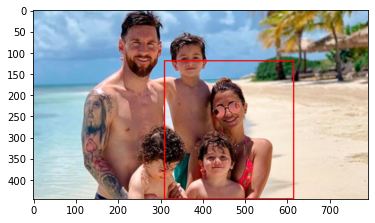

======== Using template messi-5-template.jpg
processing image messi-1.jpg...


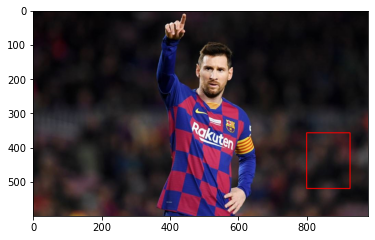

processing image messi-2.jpg...


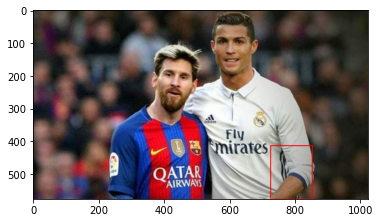

processing image messi-3.jpg...


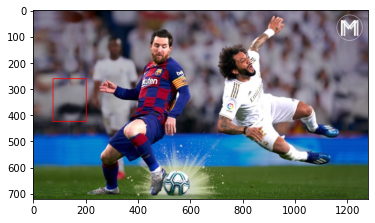

processing image messi-4.jpg...


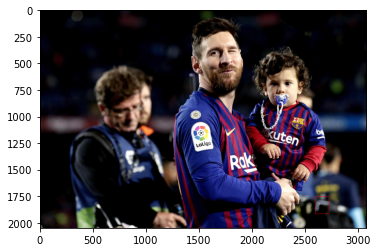

processing image messi-5.jpg...


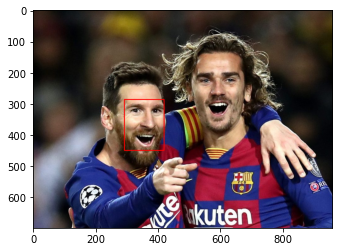

processing image messi-6.jpg...


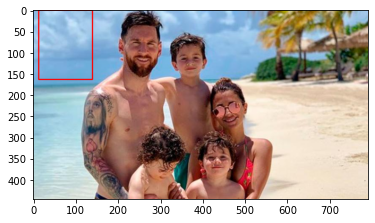

======== Using template messi-6-template.jpg
processing image messi-1.jpg...


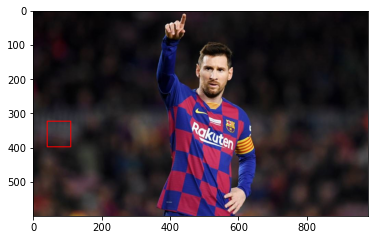

processing image messi-2.jpg...


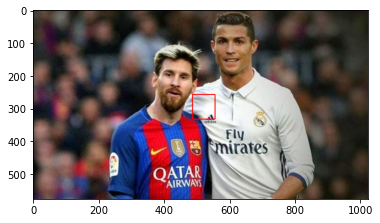

processing image messi-3.jpg...


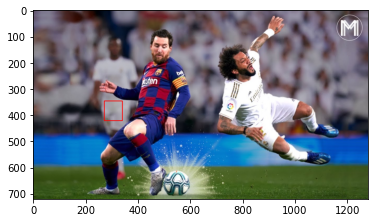

processing image messi-4.jpg...


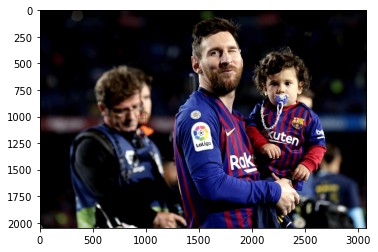

processing image messi-5.jpg...


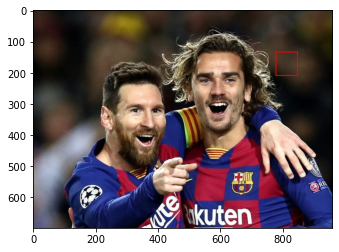

processing image messi-6.jpg...


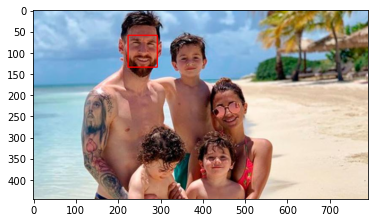

In [3]:
filenames = ("messi-1.jpg",
             "messi-2.jpg",
             "messi-3.jpg",
             "messi-4.jpg",
             "messi-5.jpg",
             "messi-6.jpg")

template_names = ("messi-1-template.jpg",
                  "messi-2-template.jpg",
                  "messi-3-template.jpg",
                  "messi-4-template.jpg",
                  "messi-5-template.jpg",
                  "messi-6-template.jpg")

for template_name in template_names:
    print("======== Using template {0}".format(template_name))

    template = cv.imread(template_name, cv.IMREAD_GRAYSCALE)

    for filename in filenames:
        print("processing image {0}...".format(filename))

        image = cv.imread(filename)
        rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        top_left, bottom_right = find_pattern(grayscale_image, template)

        cv.rectangle(rgb_image, top_left, bottom_right, 255, 2)

        plt.figure(filename)
        plt.imshow(rgb_image)
        plt.show()


Se observa que cada template funcinoa correctamente en la imagen de la que fue obtenido.
Tambien se puede ver que al utilizar un template obtenido de una imagen en otras no se obtienen buenos resultados y que los mismos dependen del template utilizado (el template que mejores resultados obtuvo fue **messi-1-template**).

## 2 - Prueba de tamaño

Para intentar mejorar los resultados y dado que las imágenes tienen distintos tamaños, se hará una prueba reduciendo las imágenes en steps.
- Se usará como template **messi-1-template**.
- Se usará como método de comparación **TM_CCOEFF_NORMED**.
- Se utilizará el método de interpolación **INTER_AREA** para reducir las imágenes ya que según indica la documentación es el mejor tipo a utilizar para este tipo de operaciones.


processing image messi-1.jpg...


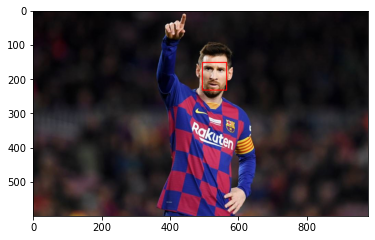

processing image messi-2.jpg...


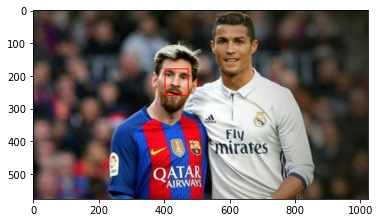

processing image messi-3.jpg...


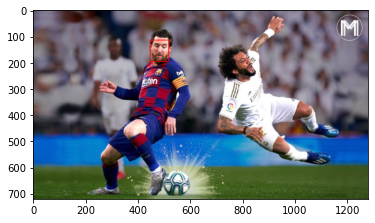

processing image messi-4-resized.jpg...


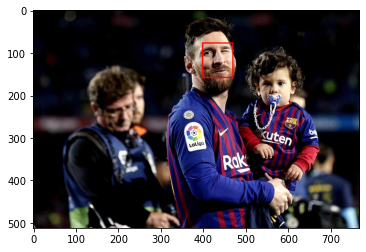

processing image messi-5-resized.jpg...


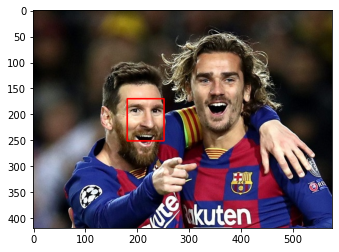

processing image messi-6-resized.jpg...


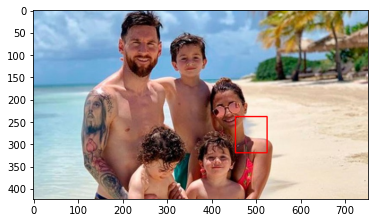

In [4]:
filenames = ("messi-1.jpg",
             "messi-2.jpg",
             "messi-3.jpg",
             "messi-4-resized.jpg",
             "messi-5-resized.jpg",
             "messi-6-resized.jpg")

template = cv.imread("messi-1-template.jpg", cv.IMREAD_GRAYSCALE)

for filename in filenames:
    print("processing image {0}...".format(filename))

    image = cv.imread(filename)
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    top_left, bottom_right = find_pattern(grayscale_image, template)

    cv.rectangle(rgb_image, top_left, bottom_right, 255, 2)

    plt.figure(filename)
    plt.imshow(rgb_image)
    plt.show()

Se observa que a excepción de la última imagen, cuando el tamaño del template es similar al de la cara de Messi, ésta se pudo reconocer correctamente.

## Conclusión
En las pruebas realizadas se observó que es importante la elección de un template adecuado así como también que este aparezca en las imágenes con un tamaño y orientación similar.
También se observó que no es una buena técnica para reconocer objetos si no se conoce el tamaño del mismo en las imágenes de antemano con lo cual este escenario no es el óptimo para aplicarla.
Se obtendrían mejores resultados en un escenario en el cual los objetos a reconocer tengan siempre la misma orientación, tamaño, iluminación etc como por ejemplo en una línea de montaje.